c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Accuracy: 80.00%
Naive Bayes Precision: 72.57%

XGBoost Accuracy: 60.00%
XGBoost Precision: 60.67%

KNN Accuracy: 84.00%
KNN Precision: 73.90%


c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Akshay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


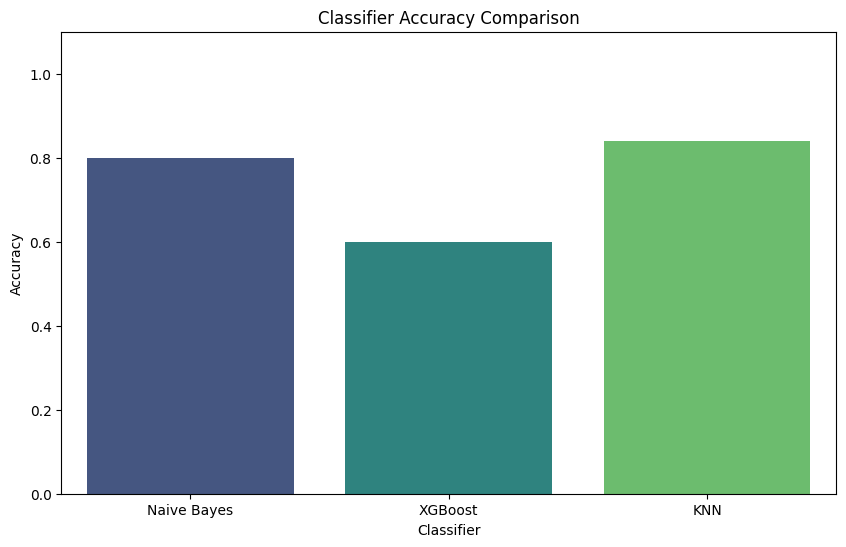

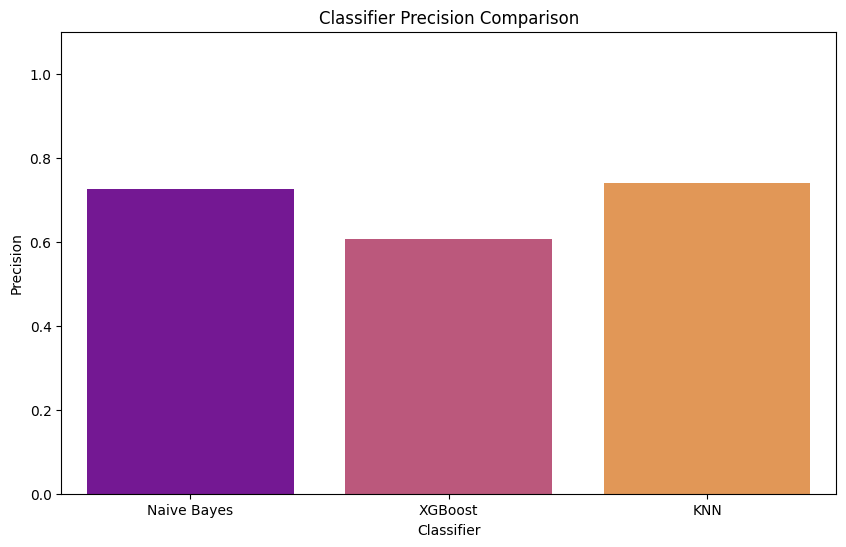

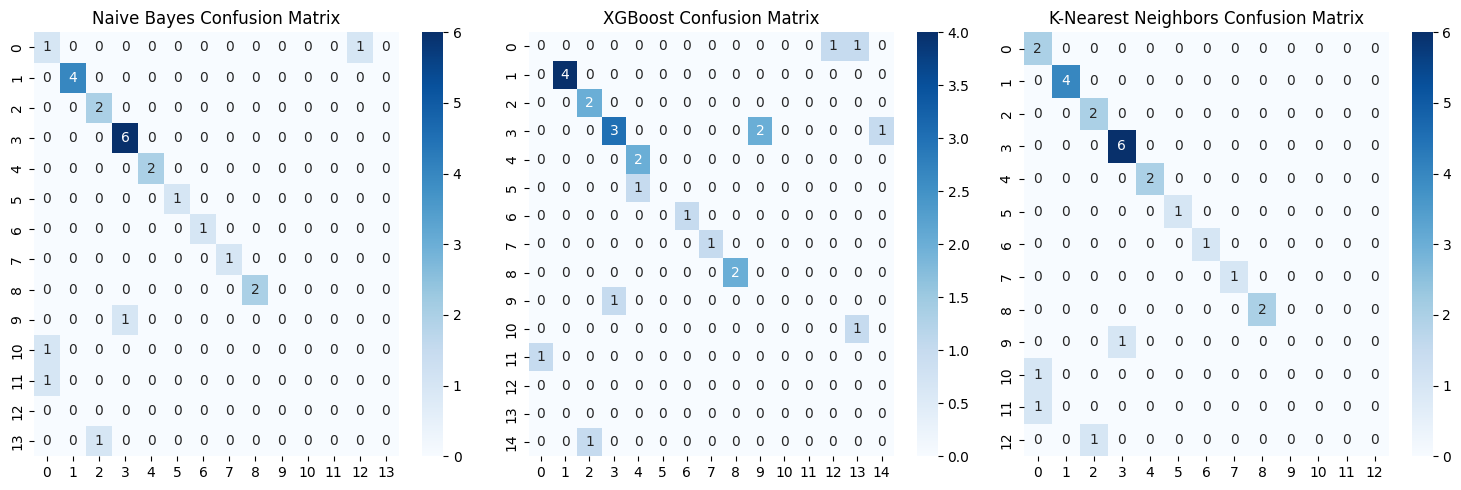

ValueError: multiclass format is not supported

In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Read the dataset
df = pd.read_csv('your_dataset.csv')

# Split the dataset into features (X) and target labels (y)
X = df['Refractive Index'].values.reshape(-1, 1)
y = df['Disease']

# Use LabelEncoder to convert string labels to numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Train the Naive Bayes classifier
clf.fit(X_train, y_train)

# Make predictions on the test set using Naive Bayes
y_pred_nb = clf.predict(X_test)

# Evaluate Naive Bayes
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
precision_nb = metrics.precision_score(y_test, y_pred_nb, average='weighted')

# Create XGBoost model
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(df['Disease'].unique()))

# Train the XGBoost model
model.fit(X_train, y_train)

# Make predictions using XGBoost
y_pred_xgb = model.predict(X_test)

# Evaluate XGBoost
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
precision_xgb = metrics.precision_score(y_test, y_pred_xgb, average='weighted')

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set using KNN
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
precision_knn = metrics.precision_score(y_test, y_pred_knn, average='weighted')

# Print accuracy and precision
print("Naive Bayes Accuracy: {:.2f}%".format(accuracy_nb * 100))
print("Naive Bayes Precision: {:.2f}%".format(precision_nb * 100))
print("\nXGBoost Accuracy: {:.2f}%".format(accuracy_xgb * 100))
print("XGBoost Precision: {:.2f}%".format(precision_xgb * 100))
print("\nKNN Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("KNN Precision: {:.2f}%".format(precision_knn * 100))


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Store the results in a DataFrame
results = pd.DataFrame({
    'Classifier': ['Naive Bayes', 'XGBoost', 'KNN'],
    'Accuracy': [accuracy_nb, accuracy_xgb, accuracy_knn],
    'Precision': [precision_nb, precision_xgb, precision_knn]
})


# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Naive Bayes Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Naive Bayes Confusion Matrix')

# XGBoost Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')

# KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_title('K-Nearest Neighbors Confusion Matrix')

plt.tight_layout()
plt.show()

# # Plot accuracy
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Classifier', y='Accuracy', data=results, palette='viridis')
# plt.title('Classifier Accuracy Comparison')
# plt.ylim(0, 1.1)
# plt.show()

# # Plot precision
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Classifier', y='Precision', data=results, palette='plasma')
# plt.title('Classifier Precision Comparison')
# plt.ylim(0, 1.1)
# plt.show()


